In [1]:
import pandas as pd

In [2]:
pd.options.display.width= None
pd.options.display.max_columns= None
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 3000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)

In [3]:
with open('datasets/volatilite_XU030.csv', 'r', encoding='utf-16') as file:
    # Read the data from the file and remove quotation marks from the header
    lines = file.readlines()
    header = lines[0].strip().strip('"')
    data_list = [line.strip().strip('"').split(';') for line in lines[1:]]

# Create DataFrame
df = pd.DataFrame(data_list, columns=header.split(';'))

# Display the DataFrame
df.head()

,Tarih (GG.AA.YYYY) / Date (DD.MM.YYYY),Endeks Kodu / Index Code,Endeksler / Index Names In Turkish,Endekslerin İngilizce İsimleri / Index Names In English,Gün Sayısı / Number of Days,Değer / Value
0,30.11.2015,XU030,BIST 30,BIST 30,21,27.94
1,30.11.2015,XU030,BIST 30,BIST 30,42,24.07
2,30.11.2015,XU030,BIST 30,BIST 30,63,22.47
3,30.11.2015,XU030,BIST 30,BIST 30,126,23.56
4,30.11.2015,XU030,BIST 30,BIST 30,252,22.91


In [4]:
df.index = pd.to_datetime(df["Tarih (GG.AA.YYYY) / Date (DD.MM.YYYY)"], format='%d.%m.%Y')
df.head()

,Tarih (GG.AA.YYYY) / Date (DD.MM.YYYY),Endeks Kodu / Index Code,Endeksler / Index Names In Turkish,Endekslerin İngilizce İsimleri / Index Names In English,Gün Sayısı / Number of Days,Değer / Value
Tarih (GG.AA.YYYY) / Date (DD.MM.YYYY),,,,,,
2015-11-30,30.11.2015,XU030,BIST 30,BIST 30,21,27.94
2015-11-30,30.11.2015,XU030,BIST 30,BIST 30,42,24.07
2015-11-30,30.11.2015,XU030,BIST 30,BIST 30,63,22.47
2015-11-30,30.11.2015,XU030,BIST 30,BIST 30,126,23.56
2015-11-30,30.11.2015,XU030,BIST 30,BIST 30,252,22.91


In [5]:
df_copy=df.copy()

In [6]:
start_date = '2015-01-01'
end_date = '2024-08-05'
filtered_df = df_copy[(df_copy.index >= start_date) & (df_copy.index <= end_date)]
filtered_df.head()

,Tarih (GG.AA.YYYY) / Date (DD.MM.YYYY),Endeks Kodu / Index Code,Endeksler / Index Names In Turkish,Endekslerin İngilizce İsimleri / Index Names In English,Gün Sayısı / Number of Days,Değer / Value
Tarih (GG.AA.YYYY) / Date (DD.MM.YYYY),,,,,,
2015-11-30,30.11.2015,XU030,BIST 30,BIST 30,21,27.94
2015-11-30,30.11.2015,XU030,BIST 30,BIST 30,42,24.07
2015-11-30,30.11.2015,XU030,BIST 30,BIST 30,63,22.47
2015-11-30,30.11.2015,XU030,BIST 30,BIST 30,126,23.56
2015-11-30,30.11.2015,XU030,BIST 30,BIST 30,252,22.91


In [7]:
df_21 = filtered_df[(filtered_df["Gün Sayısı / Number of Days"] == "21")]
df_21.head()

,Tarih (GG.AA.YYYY) / Date (DD.MM.YYYY),Endeks Kodu / Index Code,Endeksler / Index Names In Turkish,Endekslerin İngilizce İsimleri / Index Names In English,Gün Sayısı / Number of Days,Değer / Value
Tarih (GG.AA.YYYY) / Date (DD.MM.YYYY),,,,,,
2015-11-30,30.11.2015,XU030,BIST 30,BIST 30,21,27.94
2015-12-01,01.12.2015,XU030,BIST 30,BIST 30,21,21.51
2015-12-02,02.12.2015,XU030,BIST 30,BIST 30,21,21.41
2015-12-03,03.12.2015,XU030,BIST 30,BIST 30,21,21.02
2015-12-04,04.12.2015,XU030,BIST 30,BIST 30,21,21.29


In [8]:
df_21_drop = df_21.drop(["Tarih (GG.AA.YYYY) / Date (DD.MM.YYYY)", "Endeks Kodu / Index Code","Endeksler / Index Names In Turkish","Endekslerin İngilizce İsimleri / Index Names In English","Gün Sayısı / Number of Days"], axis='columns')
df_21_drop.head()

,Değer / Value
Tarih (GG.AA.YYYY) / Date (DD.MM.YYYY),
2015-11-30,27.94
2015-12-01,21.51
2015-12-02,21.41
2015-12-03,21.02
2015-12-04,21.29


In [9]:
df_21_drop["Değer / Value"]=df_21_drop["Değer / Value"].astype(float)

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [40, 15]
%matplotlib inline

Text(0.5, 1.0, 'Date/Değer-Value')

<Figure size 4000x1500 with 0 Axes>

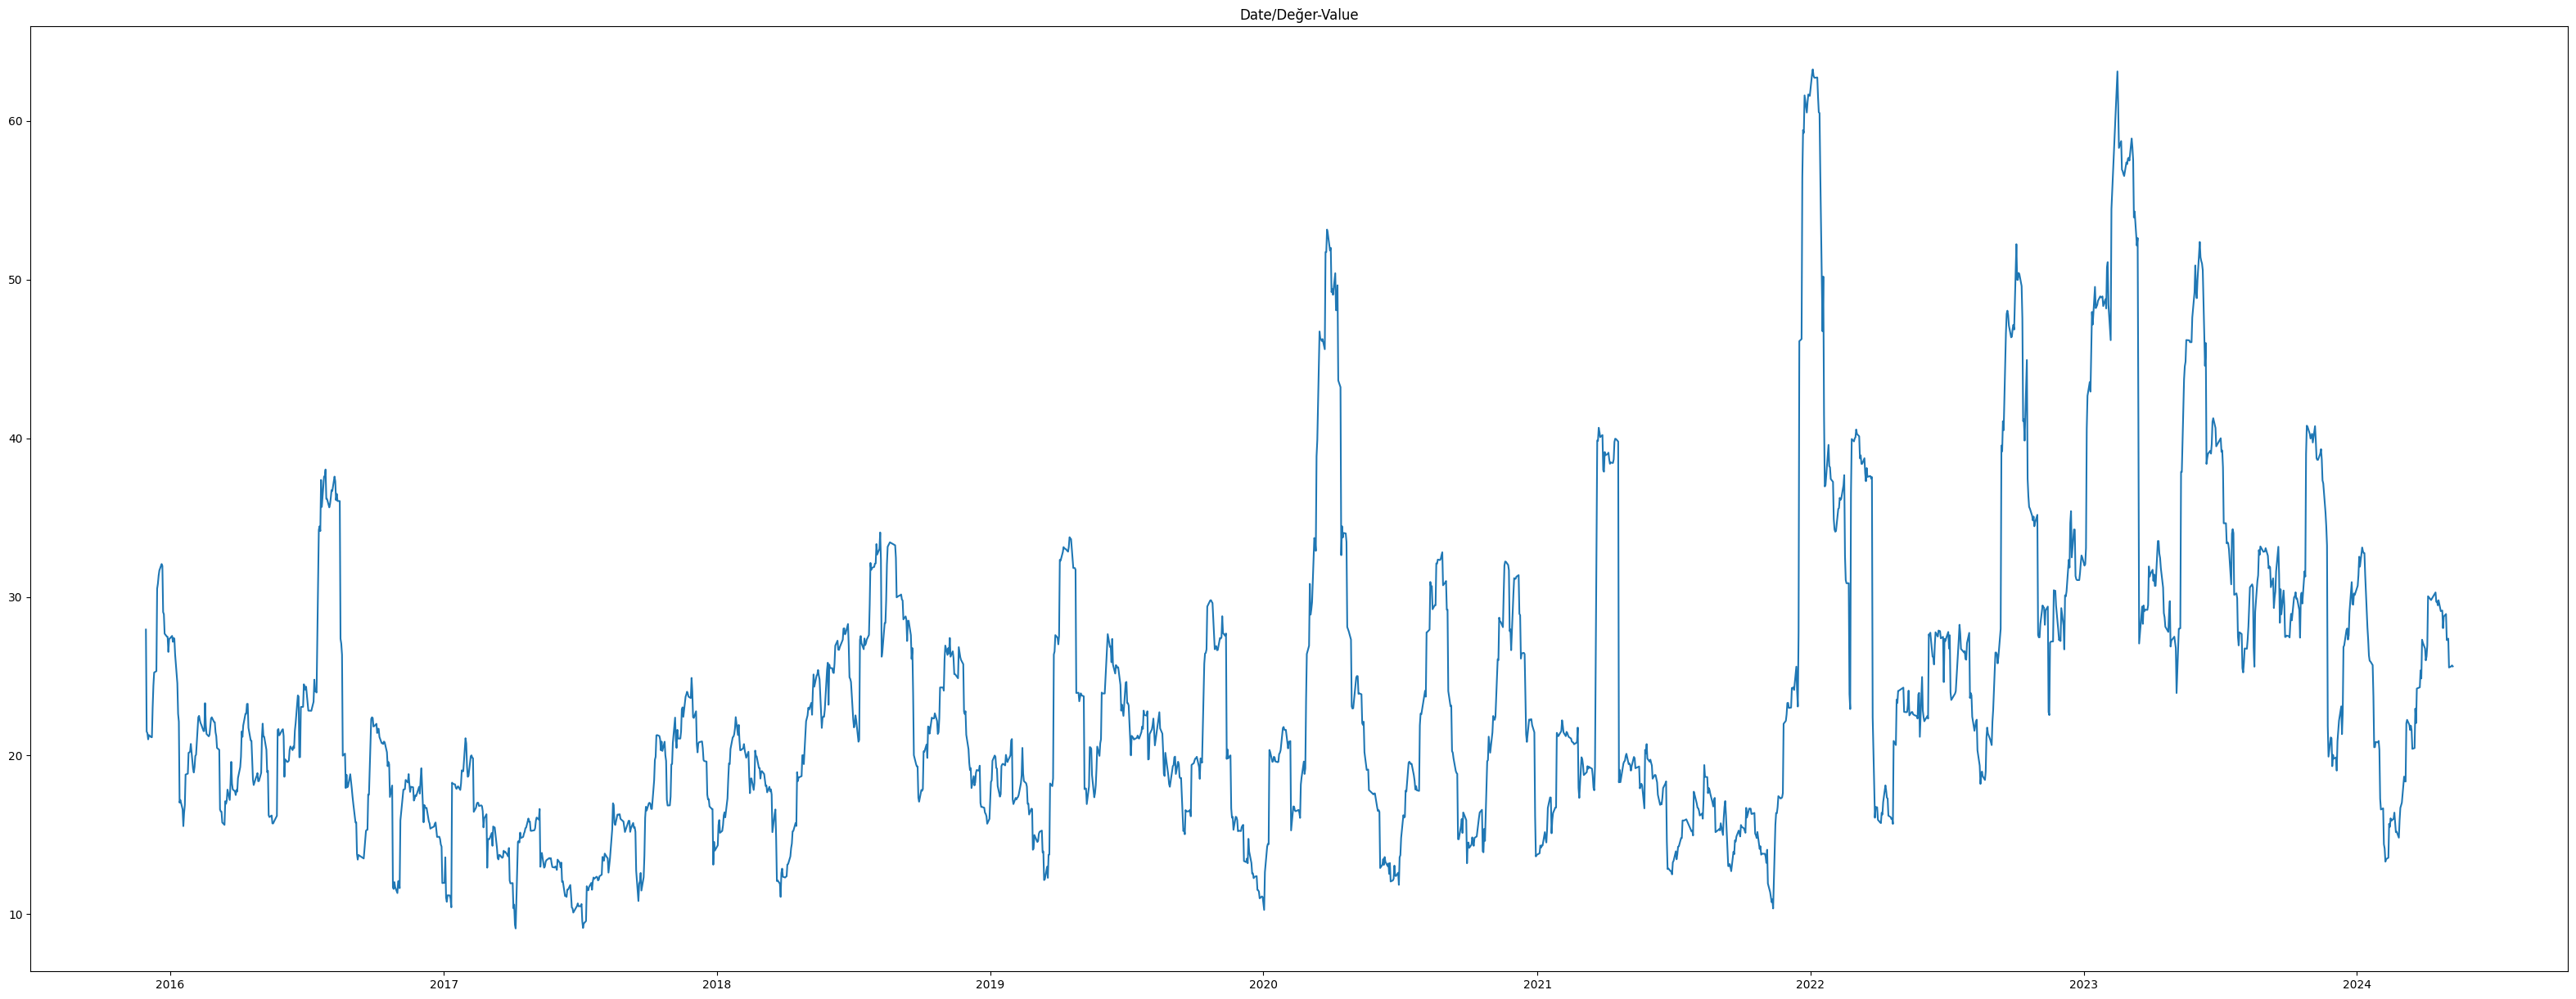

In [11]:
plt.figure()
fig, ax = plt.subplots()
ax.plot(df_21_drop.index,df_21_drop["Değer / Value"])
ax.set_title ('Date/Değer-Value')

In [12]:
len(df_21_drop)

2116

In [13]:
from statsmodels.tsa.stattools import adfuller

adf_test=adfuller(df_21_drop, autolag='AIC',regression='ct')

print(f"ADF Statistics:{adf_test[0]}")
print(f"P-value:{adf_test[1]}")
print(f"Number of Lags:{adf_test[2]}")
print(f"Number of Observations:{adf_test[3]}")
print(f"Critical Values:{adf_test[4]}")
print("Note:If P-value is smaller than 0.05, we reject the null Hypothesis")
print(f"P-value is smaller than 0.05:{0.05>adf_test[1]}")

ADF Statistics:-5.6960206549487475
P-value:9.330443223666337e-06
Number of Lags:24
Number of Observations:2091
Critical Values:{'1%': -3.9631060717799924, '5%': -3.41259173685078, '10%': -3.1282874376905356}
Note:If P-value is smaller than 0.05, we reject the null Hypothesis
P-value is smaller than 0.05:True


In [14]:
import numpy as np
for i in df_21_drop.columns:
    dt = np.array(df_21_drop[i])
    Q1 = np.percentile(dt, 25)
    Q3 = np.percentile(dt, 75)
    IQ = Q3 - Q1
    upper = Q3 + 1.5 * IQ
    lower = Q1 - 1.5 * IQ
    dt_filtered = dt.copy()  # Make a copy to avoid modifying original dt
    dt_filtered[(dt[:] > upper) | (dt[:] < lower)] = np.nan
    print(f"Length of dt: {len(dt_filtered)}")
    print(f"Length of index: {len(df_21_drop.index)}")
    df_21_drop[i] = dt_filtered

Length of dt: 2116
Length of index: 2116


In [15]:
df_21_drop.isna().sum()

Değer / Value    116
dtype: int64

In [16]:
df_21_drop=df_21_drop.interpolate(axis=0)
df_21_drop.isna().sum()

Değer / Value    0
dtype: int64

Text(0.5, 1.0, 'Date/Değer-Value')

<Figure size 1500x600 with 0 Axes>

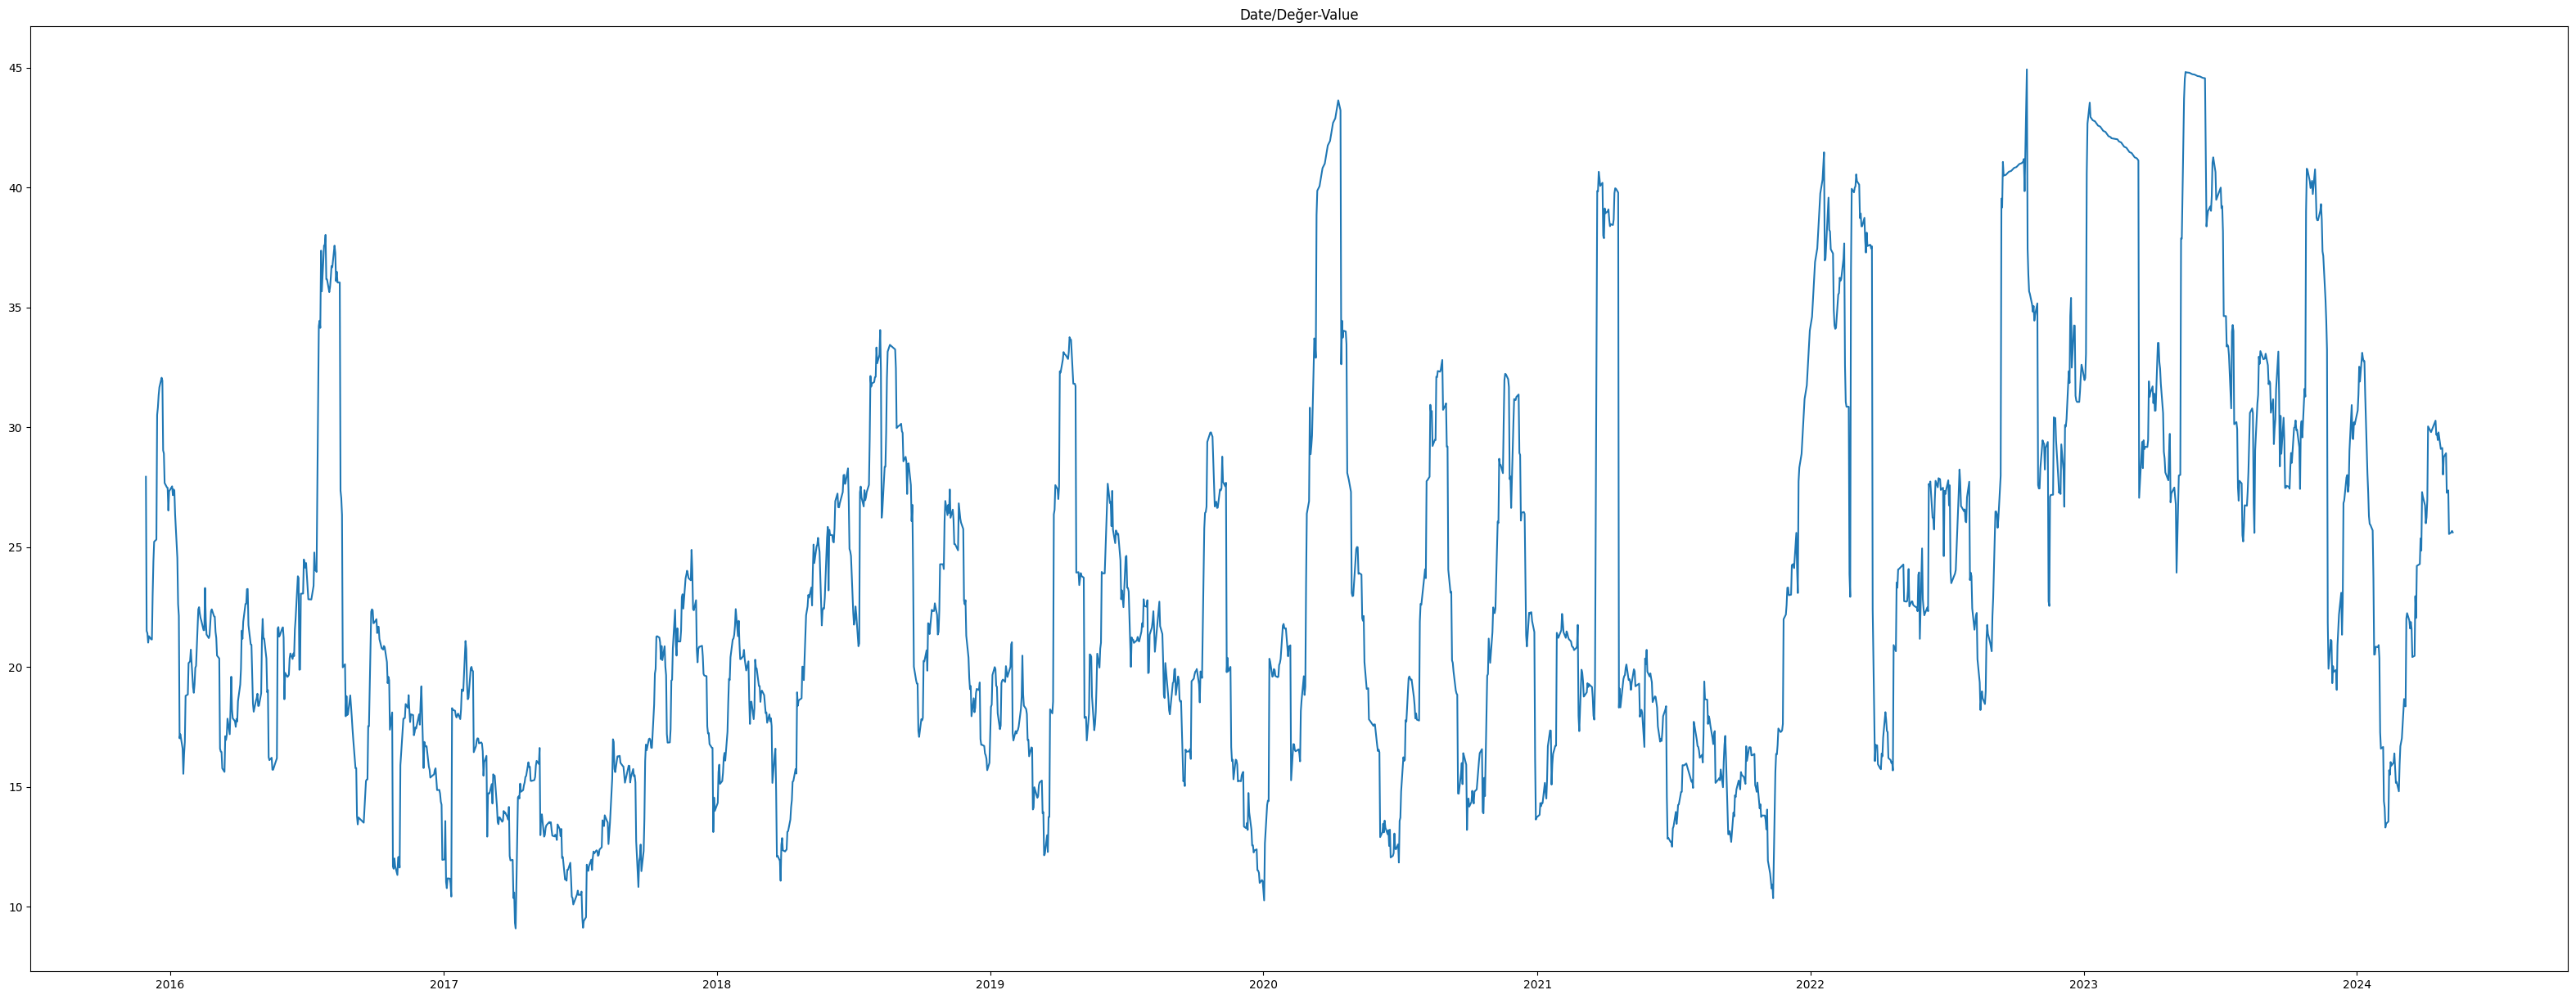

In [17]:
plt.figure(figsize=(15, 6))
fig, ax = plt.subplots()
ax.plot(df_21_drop.index,df_21_drop["Değer / Value"])
ax.set_title ('Date/Değer-Value')

In [18]:
df_final=df_21_drop.reset_index()
df_final.head()

,Tarih (GG.AA.YYYY) / Date (DD.MM.YYYY),Değer / Value
0,2015-11-30,27.94
1,2015-12-01,21.51
2,2015-12-02,21.41
3,2015-12-03,21.02
4,2015-12-04,21.29


Text(0.5, 1.0, 'Date/Değer-Value')

<Figure size 1500x600 with 0 Axes>

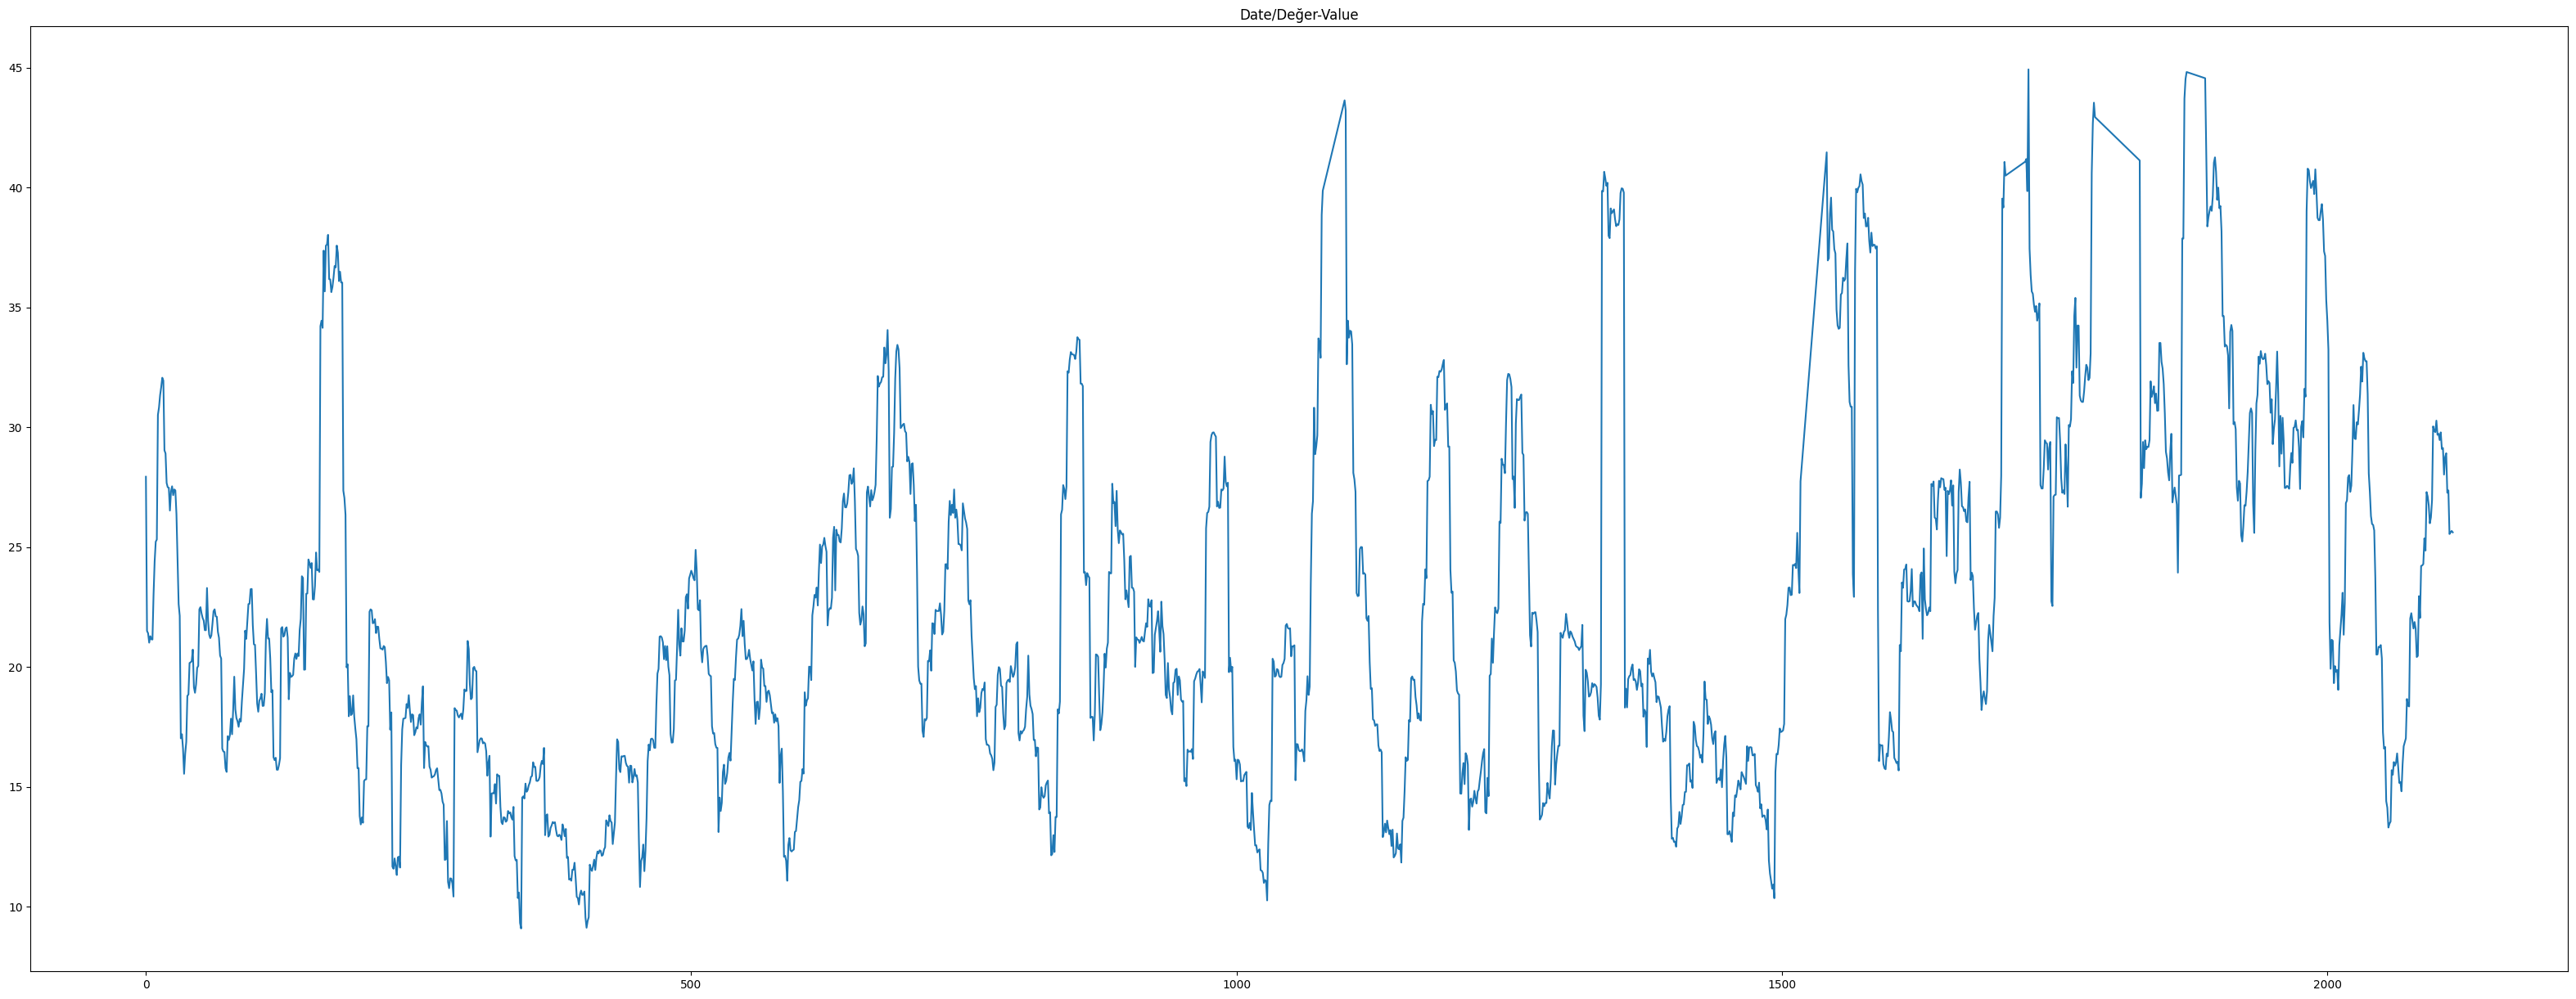

In [19]:
plt.figure(figsize=(15, 6))
fig, ax = plt.subplots()
ax.plot(df_final.index,df_final["Değer / Value"])
ax.set_title ('Date/Değer-Value')

In [20]:
dt_arr=np.array(df_final["Değer / Value"])
dt_arr

array([27.94, 21.51, 21.41, ..., 25.62, 25.68, 25.62])

In [21]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(np.array(dt_arr).reshape(-1,1))

Text(0.5, 1.0, 'Date/Değer-Value')

<Figure size 1500x600 with 0 Axes>

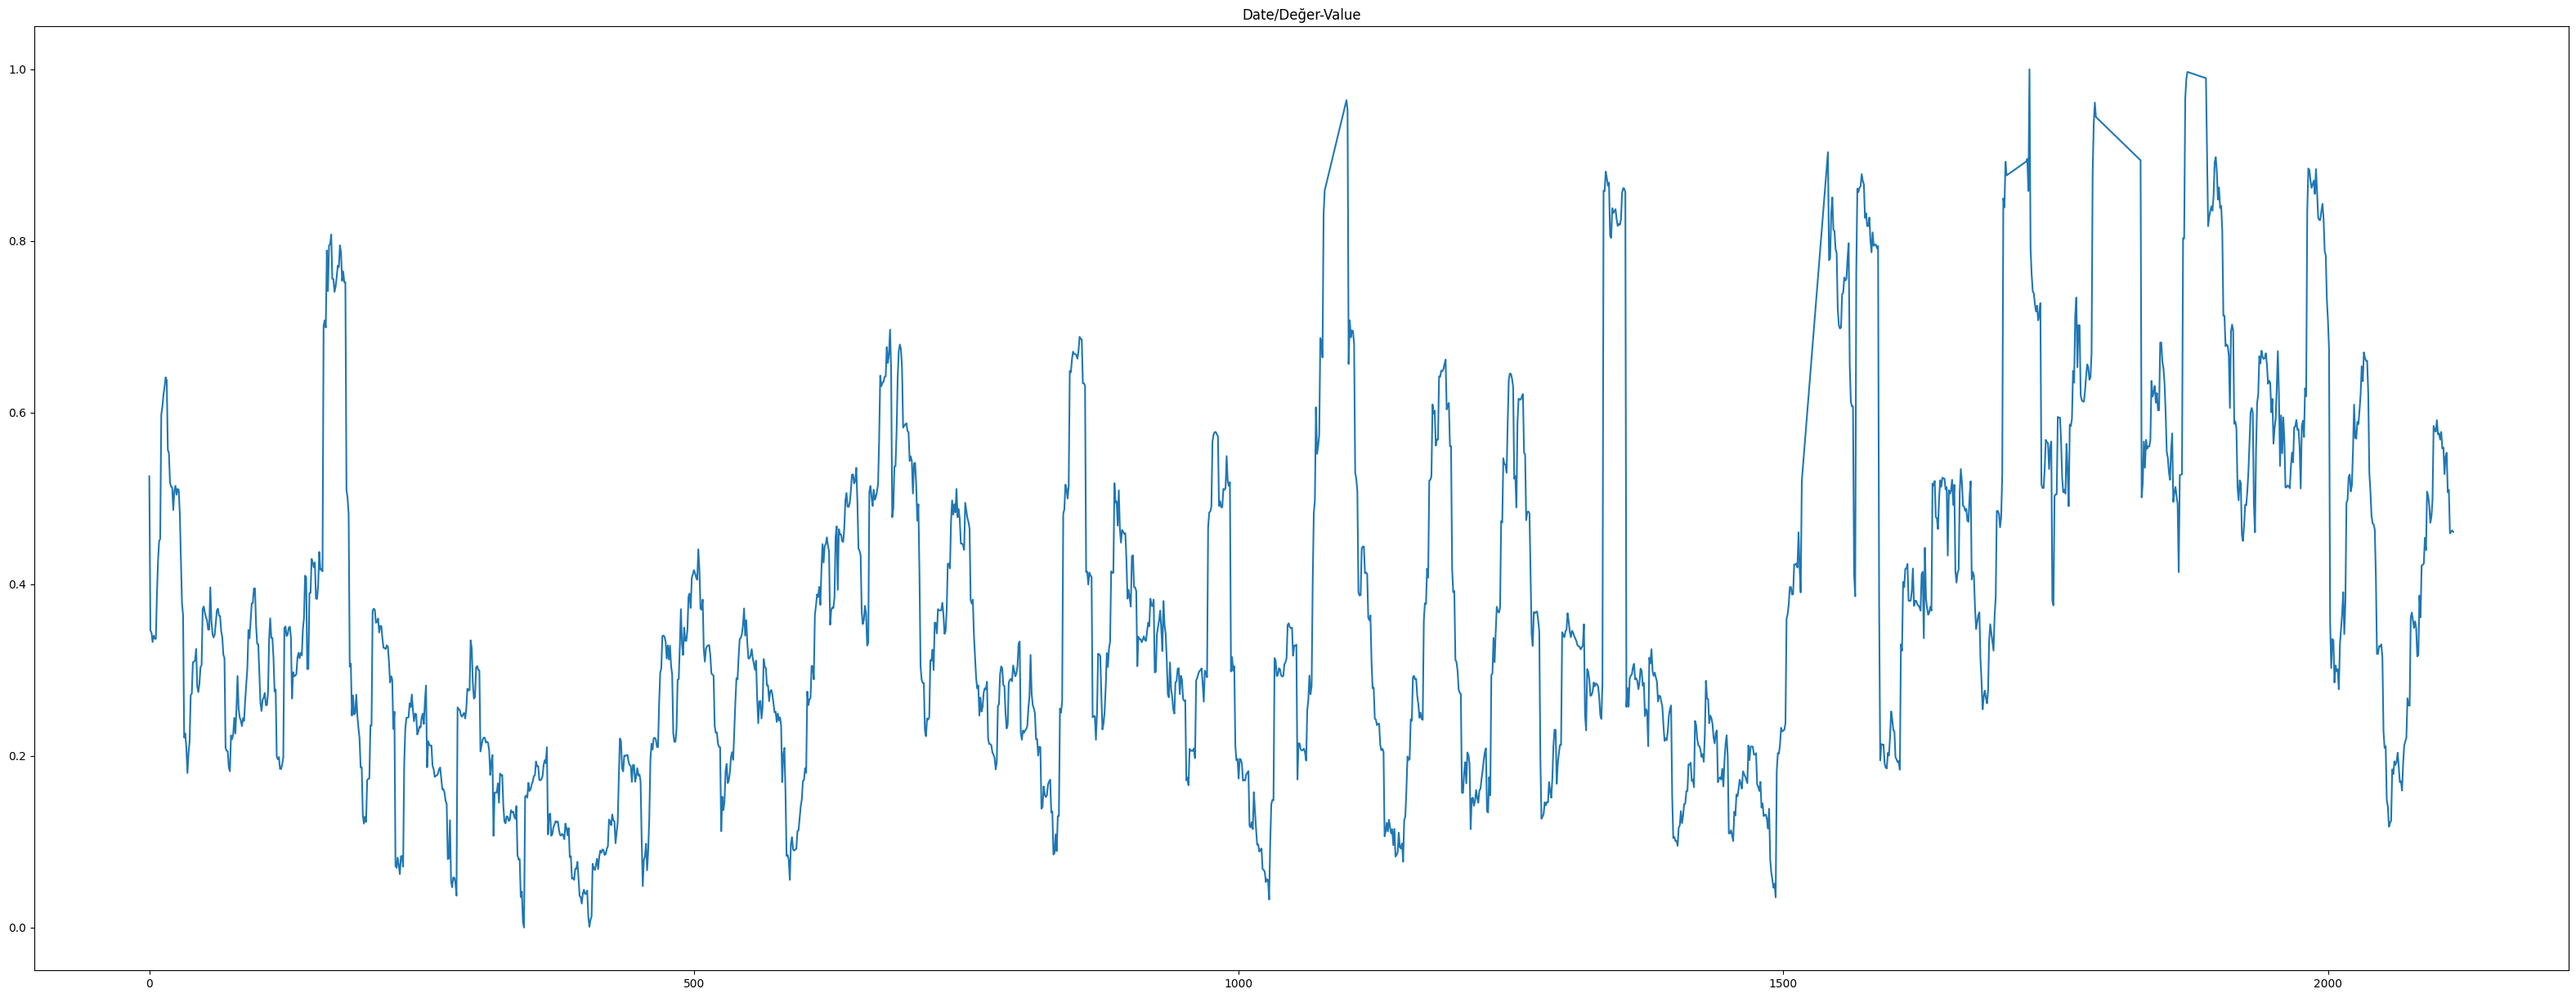

In [22]:
plt.figure(figsize=(15, 6))
fig, ax = plt.subplots()
ax.plot(scaled)
ax.set_title ('Date/Değer-Value')

In [23]:
from keras.preprocessing.sequence import TimeseriesGenerator
train, test = scaled[0:round(0.90*len(scaled))], scaled[round(0.90*len(scaled)):]
window_size=42
batch_size=32
train_generator = TimeseriesGenerator(train, train, length=window_size, batch_size=batch_size)
test_generator = TimeseriesGenerator(test, test, length=window_size, batch_size=batch_size)

# Eğitim veri setinden X_train ve y_train'i al
X_train = []
y_train = []
for i in range(len(train_generator)):
    X_batch, y_batch = train_generator[i]
    X_train.extend(X_batch)
    y_train.extend(y_batch)

# Test veri setinden X_test ve y_test'i al
X_test = []
y_test = []
for i in range(len(test_generator)):
    X_batch, y_batch = test_generator[i]
    X_test.extend(X_batch)
    y_test.extend(y_batch)

# Sonuçları numpy dizilerine dönüştür
X_train_LSTM = np.array(X_train)
y_train_LSTM = np.array(y_train)
X_test_LSTM = np.array(X_test)
y_test_LSTM = np.array(y_test)

X_train,y_train=X_train_LSTM.reshape(X_train_LSTM.shape[0], -1),y_train_LSTM.reshape(y_train_LSTM.shape[0], -1)
X_test,y_test=X_test_LSTM.reshape(X_test_LSTM.shape[0], -1),y_test_LSTM.reshape(y_test_LSTM.shape[0], -1)

print(X_train.shape)
print(X_test.shape)

(1862, 42)
(170, 42)


In [24]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
from keras import layers
from keras import backend as K
import keras
from keras.callbacks import ModelCheckpoint,EarlyStopping

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow import keras


from sklearn.model_selection import GridSearchCV,train_test_split,TimeSeriesSplit

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn import metrics

from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import seaborn as sn
import pathlib
from IPython.display import clear_output


from sklearn.svm import SVR
import numpy as np
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [25]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
    
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

class PlotLearning(Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)
        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()



In [770]:
results=pd.DataFrame(columns = ['Model', 'Dataset', 'MAE','MSE','RMSE','R2','Window','Batch_size','Patience'])

In [27]:
from sklearn.linear_model import Ridge

In [823]:
model_params = {
        'params': {
            'alpha': np.logspace(-30, 0, 30),
            'max_iter':  [100,1000,10000,100000]
        }
    }

ridge = Ridge()
ridge_grid = GridSearchCV(ridge, model_params["params"], scoring='neg_mean_squared_error',cv=5,verbose=True)
ridge_grid.fit(X_train, y_train)
print(ridge_grid.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
{'alpha': 0.008531678524172848, 'max_iter': 100}


In [824]:
ridge = Ridge(alpha=0.008531678524172848,max_iter=100)  
ridge.fit(X_train, y_train)

Ridge(alpha=0.008531678524172848, max_iter=100)

In [825]:
train_predict=ridge.predict(X_train)
test_predict=ridge.predict(X_test)

train_predict_inverse=scaler.inverse_transform(np.array(train_predict).reshape(-1,1))
test_predict_inverse=scaler.inverse_transform(np.array(test_predict).reshape(-1,1))

train_real_inverse=scaler.inverse_transform(np.array(y_train).reshape(-1,1))
test_real_inverse=scaler.inverse_transform(np.array(y_test).reshape(-1,1))

mae,mse,rmse,r2=evaluate(test_real_inverse,test_predict_inverse)
results = pd.concat([results,
                     pd.DataFrame([{
                         'Model':'Ridge',
                         'Dataset':'Test',
                         'MAE':mae,
                         'MSE':mse,
                         'RMSE':rmse,
                         'R2':r2,
                         'Window':window_size,
                         'Batch_size':batch_size,
                         'Patience':15
                     }])], ignore_index=True)

mae,mse,rmse,r2=evaluate(train_real_inverse,train_predict_inverse)
results = pd.concat([results,
                     pd.DataFrame([{
                         'Model':'Ridge',
                         'Dataset':'Train',
                         'MAE':mae,
                         'MSE':mse,
                         'RMSE':rmse,
                         'R2':r2,
                         'Window':window_size,
                         'Batch_size':batch_size,
                         'Patience':15
                     }])], ignore_index=True)
results

,Model,Dataset,MAE,MSE,RMSE,R2,Window,Batch_size,Patience
0,Ridge,Test,0.848229,1.833885,1.354210,0.960716,42,32,15
1,Ridge,Train,0.805643,2.270715,1.506889,0.967989,42,32,15
2,MLP,Test,1.263995,3.166065,1.779344,0.932180,42,32,15
3,MLP,Train,1.178500,3.426753,1.851149,0.951691,42,32,15
4,LSTM,Test,1.002843,2.462234,1.569151,0.947256,42,32,15
5,LSTM,Train,1.055247,3.077909,1.754397,0.956609,42,32,15
6,LSTM,Test,1.002843,2.462234,1.569151,0.947256,42,32,15
7,LSTM,Train,1.055247,3.077909,1.754397,0.956609,42,32,15
8,MLP,Test,1.236062,3.268041,1.807772,0.929995,42,32,15
9,MLP,Train,1.137027,3.231594,1.797663,0.954443,42,32,15


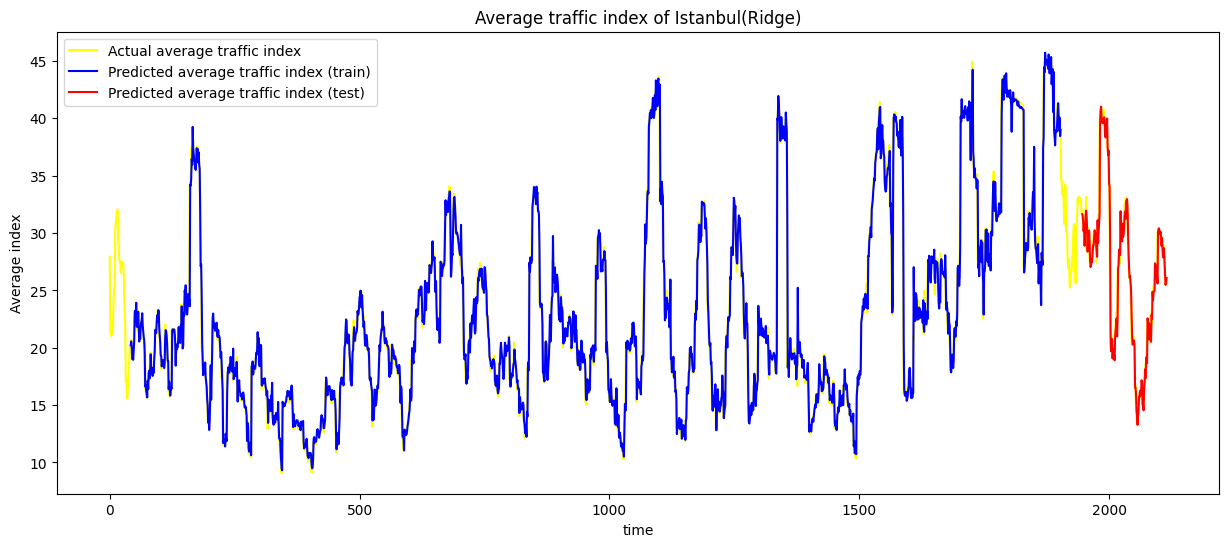

In [826]:
plt.figure(figsize=(15, 6))
plt.plot(df_final["Değer / Value"], color='yellow', label="Actual average traffic index")

# Shifting the x-values for the second plot by 60 for training data
shifted_train_predict_values = np.arange(len(train_predict_inverse)) + window_size
plt.plot(shifted_train_predict_values, train_predict_inverse, color='blue', label="Predicted average traffic index (train)")

# Shifting the x-values for the third plot by 120 for test data
shifted_test_predict_values = np.arange(len(test_predict_inverse)) + len(train_predict_inverse) + 2*window_size
test_predict_inverse_flattened = test_predict_inverse.flatten()  # Flatten test_predict_inverse
plt.plot(shifted_test_predict_values, test_predict_inverse_flattened, color='red', label="Predicted average traffic index (test)")

plt.title("Average traffic index of Istanbul(Ridge)")
plt.xlabel("time")
plt.ylabel("Average index")
plt.legend()
plt.show()

In [827]:
import plotly.offline as py
import plotly.graph_objs as go

In [828]:
actual_trace = go.Scatter(
    x=df_21_drop.tail(len(test_predict)).index,
    y=test_real_inverse.flatten(),
    mode='lines',
    name="Actual BIST 30 Volatilite",
    line=dict(color='red')
)

test_actual_trace = go.Scatter(
    x=df_21_drop.tail(len(test_predict)).index,
    y=test_predict_inverse.flatten(),
    mode='lines',
    name="Predicted BIST 30 Volatilite",
    line=dict(color='blue')
)

data = [actual_trace, test_actual_trace]

layout = go.Layout(
    title="BIST 30 Endeksleri Tarihsel Volatilite Değerleri",
    xaxis=dict(title="Time"),
    yaxis=dict(title="BIST 30 Volatilite"),
    legend=dict(x=0, y=1)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)
print("Doğruluk:",r2*100)

Doğruluk: 96.80004278130325


In [829]:
test_Akcay=ridge.predict(X_test[-1].reshape(1,-1))
test_Akcay=scaler.inverse_transform(np.array(test_Akcay).reshape(-1,1))

In [830]:
test_Akcay[0][0]

26.08113688790973

In [833]:
projection=40

data_projection=X_test[-1]
data_projection_control=data_projection

In [834]:
for i in range(0,projection+1):
    test_Akcay=mlp.predict(data_projection.reshape(1,-1))
    data_projection = np.roll(data_projection, -1)
    data_projection[-1] = test_Akcay[0]
data_projection[-projection:]

array([0.43160834, 0.42077927, 0.40182073, 0.37438712, 0.35928401,
       0.33870379, 0.32570473, 0.31186284, 0.30877092, 0.27695807,
       0.26623111, 0.26870608, 0.26012074, 0.26085981, 0.25894776,
       0.24764009, 0.25210094, 0.25041855, 0.24580675, 0.25360737,
       0.24081244, 0.25008188, 0.25324424, 0.25214566, 0.25810906,
       0.26039221, 0.26113764, 0.26010249, 0.26954106, 0.26757758,
       0.28160619, 0.28412404, 0.28333651, 0.28817718, 0.28905978,
       0.29470905, 0.29388447, 0.30054482, 0.30002546, 0.30207962])

In [835]:
arr_scaled=scaler.inverse_transform(np.array(data_projection_control).reshape(-1,1))

In [836]:
data_projection_scaled=scaler.inverse_transform(np.array(data_projection[-projection:]).reshape(-1,1))

In [837]:
final_arr = np.concatenate((np.squeeze(arr_scaled), np.squeeze(data_projection_scaled)))

In [838]:
import pandas as pd
from pandas.tseries.offsets import DateOffset

# Get the start date from the DataFrame
start_date = df_final.iloc[-1]["Tarih (GG.AA.YYYY) / Date (DD.MM.YYYY)"]
# Calculate the end date by adding projection and window_size
end_date = start_date + DateOffset(days=(projection+2*(projection//5)))

# Create a date range
date_range = pd.date_range(start=start_date, end=end_date)

# Filter out weekends and ensure the length is len(final_arr)
weekdays = date_range[date_range.dayofweek < 5][:len(final_arr)]

# Remove the start date from the weekdays if it's present
if len(weekdays) > 0 and weekdays[0] == start_date:
    weekdays = weekdays[1:]

# Create a DataFrame with the date data
df_dates = pd.DataFrame({'Tarih (GG.AA.YYYY) / Date (DD.MM.YYYY)': weekdays})

In [839]:
df_final_subset = df_final.iloc[-(window_size):]["Tarih (GG.AA.YYYY) / Date (DD.MM.YYYY)"]
df_final_subset = df_final_subset.to_frame()

# Concatenate df_final_subset and df_dates along rows
df_res = pd.concat([df_final_subset, df_dates], ignore_index=True)

In [840]:
df_res.insert(1, "Values", final_arr, True)

In [842]:
import plotly.graph_objs as go

actual_trace = go.Scatter(
    x=df_res["Tarih (GG.AA.YYYY) / Date (DD.MM.YYYY)"].iloc[:window_size],
    y=df_res["Values"].iloc[:window_size],
    mode='markers',
    name="Geçmiş BIST 30 Volatilite Verileri",
    line=dict(color='blue')
)

test_actual_trace = go.Scatter(
    x=df_res["Tarih (GG.AA.YYYY) / Date (DD.MM.YYYY)"].iloc[window_size:],
    y=df_res["Values"].iloc[window_size:],
    mode='markers',
    name=f"{projection} Günlük BIST 30 Volatilite Tahmin",
    line=dict(color='red')
)

total_trace = go.Scatter(
    x=df_res["Tarih (GG.AA.YYYY) / Date (DD.MM.YYYY)"],
    y=df_res["Values"],
    mode='lines',
    name="BIST 30 Volatilite Tahmin+Gerçek",
    line=dict(color='yellow')
)

data = [actual_trace, test_actual_trace, total_trace]

layout = go.Layout(
    title=f"{projection} Günlük BIST 30 Endeksleri Tarihsel Volatilite Tahminleri",
    xaxis=dict(title="Time"),
    yaxis=dict(title="BIST 30 Volatilite"),
    legend=dict(x=0, y=1)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [847]:
from joblib import dump, load
dump(ridge, 'models/ridge_model_10May2024.joblib')
scaler_filename = "scalers/bist30-scaler.save"
dump(scaler, scaler_filename) 

['scalers/bist30-scaler.save']